# 2º Teste - Rita Lobo 55883

Coleção de (praticamente) tudo o que fiz

Para análise de ficheiros de áudio:
- librosa - audio signal extraction and visualization
- pydub - audio file manipulation
- wave - reading wav files

Generic features that can be extracted
- Channels: number of channels; 1 for mono, 2 for stereo audio
- Sample width: number of bytes per sample; 1 means 8-bit, 2 means 16-bit
- Frame rate/Sample rate: frequency of samples used (in Hertz)
- Frame width: Number of bytes for each “frame”. One frame contains a sample for each channel.
- Length: audio file length (in milliseconds)
- Frame count: the number of frames from the sample
- Intensity: loudness in dBFS (dB relative to the maximum possible loudness)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import math
import speech_recognition as sr
import pyaudio
import wave
from pydub import AudioSegment  
from pydub.playback import play  
from pandas import DataFrame
import pandas as pd
import scipy

c:\users\rita lobo\appdata\local\programs\python\python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
sr.Microphone.list_microphone_names() 
#list_microphone_names() - retornará uma matriz / lista dos microfones conectados ao sistema.

['Microsoft Sound Mapper - Input',
 'Microphone Array (Realtek(R) Au',
 'Microsoft Sound Mapper - Output',
 'Speakers (Realtek(R) Audio)',
 'Primary Sound Capture Driver',
 'Microphone Array (Realtek(R) Audio)',
 'Primary Sound Driver',
 'Speakers (Realtek(R) Audio)',
 'Speakers (Realtek(R) Audio)',
 'Microphone Array (Realtek(R) Audio)',
 'Microphone Array (Realtek HD Audio Mic input)',
 'Stereo Mix (Realtek HD Audio Stereo input)',
 'Speakers 1 (Realtek HD Audio output with SST)',
 'Speakers 2 (Realtek HD Audio output with SST)',
 'PC Speaker (Realtek HD Audio output with SST)']

## Gravar o áudio

Código que captura o som com o microfone do computador e depois grava o mesmo num ficheiro wav, bem como a passagem de "data" e "fs" para variáveis a partir do load do ficheiro criado.

In [559]:
# Record a few seconds of audio and save to a WAVE file.

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 11025
RECORD_SECONDS = 2 # valor que queremos 600
WAVE_OUTPUT_FILENAME = ("c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav")

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()



wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording
* done recording


In [560]:
data, fs = librosa.load('c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav')

## Ouvir o áudio

Ambos os casos conseguem reproduzir o áudio capturado, foi apenas para ver que diferentes formas existiam

In [467]:
from pydub import AudioSegment  
from pydub.playback import play  
  
wav_file = AudioSegment.from_file(file = ("c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/outro_projeto.wav"),  
                                  format = "wav")  
play(wav_file)

In [300]:
import IPython.display as ipd
ipd.Audio('c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav')

## Características

Nesta parte vou extrair um número de características que poderia passar para o Streamlit

In [561]:
data

array([-2.20238417e-06, -1.06761727e-05, -1.28488555e-05, ...,
       -1.75717436e-02, -2.36943942e-02, -1.52041474e-02], dtype=float32)

##### Começar por ver o FFT do sinal

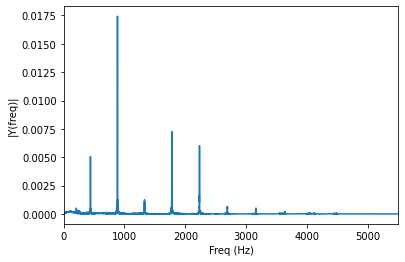

In [587]:
import numpy
import matplotlib.pyplot as plt 

n = len(data) # length of the signal
k = numpy.arange(n)
T = n/fs
frq = k/T # two sides frequency range
frq = frq[:len(frq)//2] # one side frequency range

Y = numpy.fft.fft(data)/n # dft and normalization
Y = Y[:n//2]

plt.plot(frq,abs(Y)) # plotting the spectrum
plt.xlabel('Freq (Hz)')
plt.xlim(0,5500)
plt.ylabel('|Y(freq)|')
plt.show()

In [564]:
n = data.size

timestep = 0.1

freqs= numpy.fft.fftfreq(n, d=timestep)
freqs=freqs[:len(freqs)//2] #?
freqs

array([0.00000000e+00, 2.32514881e-04, 4.65029762e-04, ...,
       4.99930246e+00, 4.99953497e+00, 4.99976749e+00])

Calcular a Frequência fundamental

In [582]:
f0 = librosa.yin(data, fmin = librosa.note_to_hz('C2'), fmax= librosa.note_to_hz('C7'), sr = fs)
f0

array([2205.        , 2205.        , 2205.        , 2205.        ,
       2205.        , 2205.        , 2205.        , 2205.        ,
       2205.        , 2205.        , 2205.        ,  116.58355237,
        264.2632682 ,  116.6151386 ,  231.34929614,  350.30062044,
        294.79712299,   67.75417257,  444.33880514,  444.76587748,
        443.90410346,  887.44274173,  443.50983038,  442.78369662,
        127.32176437,  127.30500291,  894.54989405,  887.94656348,
        888.15640989,  886.66622583,  886.90577789,  887.38956607,
        888.04790764,  888.29217626,  887.82554529,  888.10058112,
        888.26019839,  443.83895977,  443.9480362 ,  444.25964667,
        444.932283  ,  445.21915117,  445.33207801,  445.54860041,
        445.59064575,  445.45708946,  445.33065702,  445.24428597,
        445.24621982,  445.27037455,  445.26385427,  445.08979894,
        444.91743794,  444.89662648,  444.86760127,  444.62989267,
        444.40944945,  444.15719052,  443.95227903,  443.95269

In [586]:
import statistics

statistics.median(f0.tolist())

444.89662647846274

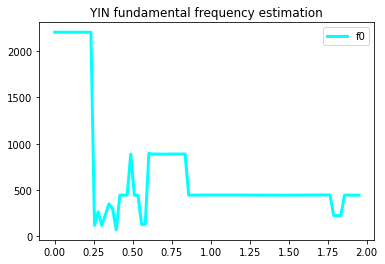

In [583]:
times = librosa.times_like(f0)

fig, ax = plt.subplots()
ax.set(title='YIN fundamental frequency estimation')
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')
plt.show()

De seguida estão várias características que se podem extrair a partir do fft do sinal

In [567]:
#Return the Discrete Fourier Transform sample frequencies.
#The returned float array f contains the frequency bin centers in cycles per unit of the sample spacing (with zero at the start). For instance, if the sample spacing is in seconds, then the frequency unit is cycles/second.
#Given a window length n and a sample spacing d:

freqs = numpy.fft.fftfreq(data.size)

mean1 = numpy.mean(freqs) # Mean Frequency
std1 = numpy.std(freqs) # Standard deviation of frequency
maxv1 = numpy.amax(freqs) # 
minv1 = numpy.amin(freqs) #
median1 = numpy.median(freqs) # median frequency (in kHz)
skew1 = scipy.stats.skew(freqs) # skewness
kurt1 = scipy.stats.kurtosis(freqs) #kurtosis 
q11 = numpy.quantile(freqs, 0.25) #
q31 = numpy.quantile(freqs, 0.75) #
mode1 = scipy.stats.mode(freqs)[0][0] # Mode frequency
iqr1 = scipy.stats.iqr(freqs) # Interquantile range (in kHz)
    
l = [mean, std, maxv, minv, median, skew, kurt, q1, q3, mode, iqr]

l

[5512.24365234375,
 3182.6433554665364,
 11024.4873046875,
 0.0,
 5512.24365234375,
 0.0,
 -1.2000000051900641,
 2756.121826171875,
 8268.365478515625,
 0.0,
 5512.24365234375]

##### Root Mean Square Energy

A Energia RMS (RMSE) corresponde à raíz quadrada da média da amplitude numa janela temporal ao quadrado.

In [473]:
y, fs = librosa.load('c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav')

rmse = librosa.feature.rms(y=y)[0]
print(rmse)

[6.58658337e-06 8.35389528e-06 9.67864889e-06 9.93058711e-06
 1.02482845e-05 1.00769776e-05 1.00358748e-05 9.71571899e-06
 9.42067345e-06 9.58099099e-06 1.05459030e-05 2.26724424e-05
 3.31343836e-05 5.15417451e-05 6.53509123e-05 1.21372184e-04
 1.49652551e-04 4.11202403e-04 2.99545820e-03 2.99655390e-03
 3.00959940e-03 5.15569560e-03 5.19278180e-03 7.34104356e-03
 1.09399101e-02 1.17835347e-02 1.23697231e-02 1.16330748e-02
 8.71071871e-03 6.65332237e-03 6.60449499e-03 1.13832671e-02
 1.34259500e-02 1.46784587e-02 1.93602555e-02 2.40818001e-02
 2.58268714e-02 2.59837247e-02 2.26710886e-02 1.61313359e-02
 1.32093951e-02 1.53773976e-02 1.85732618e-02 2.12072749e-02
 2.48749088e-02 2.89479662e-02 2.92560663e-02 2.99592186e-02
 3.22251059e-02 3.80676687e-02 4.46463339e-02 4.82531488e-02
 4.65896018e-02 3.99207510e-02 3.33728641e-02 3.37169170e-02
 3.43618020e-02 3.59044820e-02 3.76019627e-02 3.59365158e-02
 3.88482288e-02 4.16962057e-02 4.32016589e-02 4.34113331e-02
 4.10308652e-02 3.820837

[Text(0.5, 1.0, 'log Power spectrogram')]

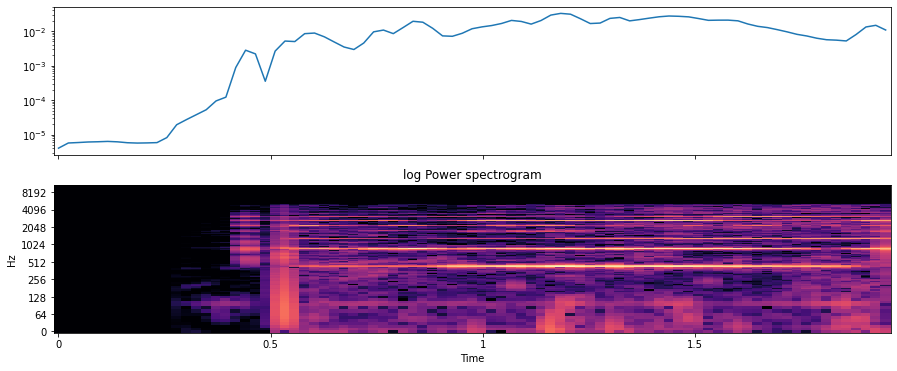

In [474]:
# Get RMS value from each frame's magnitude value
S, phase = librosa.magphase(librosa.stft(data))
rms = librosa.feature.rms(S=S)

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
#ax[0].set(xticks=[])
#ax[0].legend()
#ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=numpy.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
#plt.ylim(0,1000)

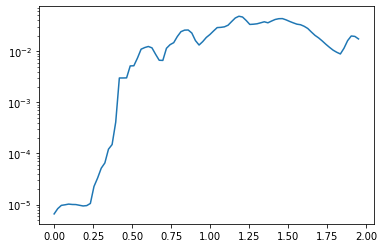

In [475]:
times = librosa.times_like(rmse)
#plt.plot(times, rmse)
plt.semilogy(times, rmse, label='RMS Energy') # Este fica com escala logarítmica

##### Espectrograma

Duas formas diferentes de fazer o espectrograma do sinal

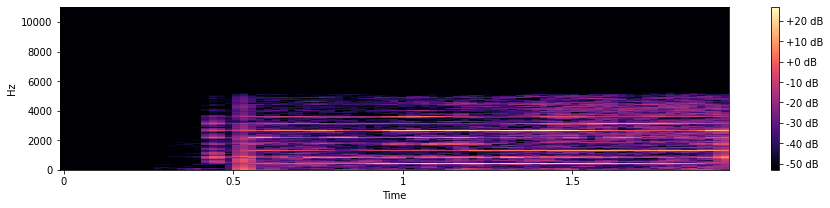

In [482]:
x, sr = librosa.load('c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav')

# Spectrogram of frequency
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(15, 3))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
#plt.ylim(0,1200)

In [483]:
#Espectograma -- Usar FFT
librosa.stft(data)
#sinal dos dados -- valores imaginários - complexos

array([[-2.28852135e-04+0.00000000e+00j, -2.72764795e-04+0.00000000e+00j,
        -1.11079418e-04+0.00000000e+00j, ...,
        -6.29017949e-02+0.00000000e+00j, -4.78988260e-01+0.00000000e+00j,
        -3.54120225e-01+0.00000000e+00j],
       [ 1.84443095e-04-1.26874918e-04j,  9.41040853e-05+8.22671282e-05j,
         1.34493399e-04+9.04934204e-05j, ...,
        -1.09855406e-01-3.07723194e-01j,  4.53751624e-01-1.05283968e-01j,
         1.59388930e-01+2.40113303e-01j],
       [-3.48311914e-05+1.84844670e-04j,  1.13866423e-04-2.63906055e-04j,
        -3.80650221e-04+6.39132049e-05j, ...,
         2.37460941e-01+2.65892535e-01j, -2.25629374e-01-3.86614585e-03j,
         5.85193485e-02-1.27741411e-01j],
       ...,
       [ 1.27968201e-06+1.52038848e-09j, -6.40219980e-07-7.63434926e-10j,
         4.69523621e-11-1.01090915e-11j, ...,
        -2.53214751e-07+9.17717884e-08j, -3.62111226e-04-1.69997850e-06j,
         7.26169208e-04+3.18453203e-06j],
       [-1.27968281e-06-7.67598929e-10j, -3.

In [484]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#usar módulo para tirar os imaginários
ffff=np.abs(librosa.stft(data))

Text(0.5, 1.0, 'Espectograma')

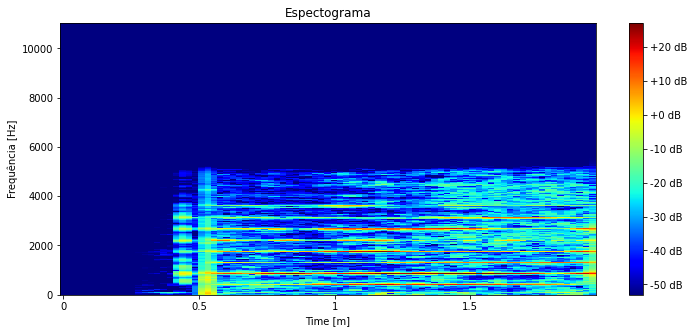

In [485]:
#amplitude em db para o espectograma
plt.figure(figsize=(12,5))

X = librosa.stft(x)
D=librosa.amplitude_to_db(np.abs(X))

librosa.display.specshow(D,x_axis='time',y_axis='hz', sr=sr,cmap='jet')
plt.xlabel('Time [m]')
plt.ylabel('Frequência [Hz]')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectograma")

### Waveform

Podemos fazer o plot do vetor de áudio, aqui novamente de duas formas diferentes

Text(12.5, 0.5, '')

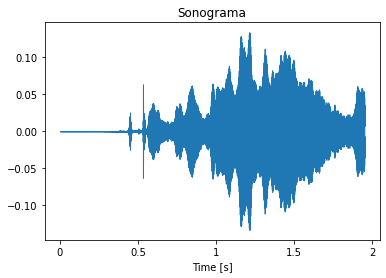

In [490]:
librosa.display.waveshow(data, sr=sr)
plt.title("Sonograma")
plt.xlabel('Time [s]')
plt.ylabel('')
#Frequência [Hz]?

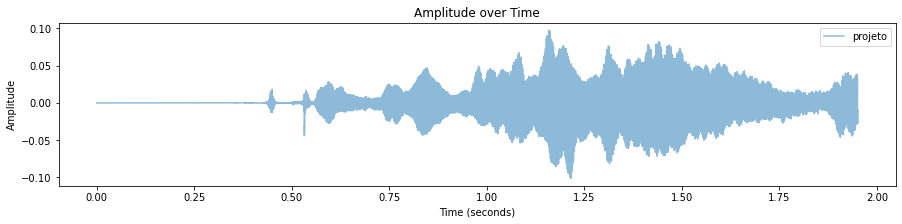

In [491]:
#Visualizar a amplitude ao longo do tempo

# Open wav file and read frames as bytes
sf_filewave = wave.open("c:/Users/Rita Lobo/Documents/Rita Lobo/Universidade - Biomédica/5º ano/AAIB/projeto.wav", 'r')
signal_sf = sf_filewave.readframes(-1)

# Convert audio bytes to integers
soundwave_sf = numpy.frombuffer(signal_sf, dtype='int16')/len(data)

# Get the sound wave frame rate
framerate_sf = sf_filewave.getframerate()

# Find the sound wave timestamps
time_sf = numpy.linspace(start=0,
                      stop=len(soundwave_sf)/framerate_sf,
                      num=len(soundwave_sf))/2

# Set up plot
f, ax = plt.subplots(figsize=(15, 3))

# Setup the title and axis titles
plt.title('Amplitude over Time')
plt.ylabel('Amplitude')
plt.xlabel('Time (seconds)')

# Add the audio data to the plot
plt.plot(time_sf, soundwave_sf, label='projeto', alpha=0.5)

plt.legend()
plt.show()

De forma a perceber com que tipo de dados estava a trabalhar fui ver as várias variáveis em causa.
Assim:
- tanto a time_sf como a soundwave_sf são arrays
- a lista=[time_sf, soundwave_sf] vai ser uma lista de arrays

In [492]:
lista=[time_sf, soundwave_sf]
lista

[array([0.00000000e+00, 4.53525284e-05, 9.07050569e-05, ...,
        1.95038549e+00, 1.95043084e+00, 1.95047619e+00]),
 array([ 0.00000000e+00,  0.00000000e+00, -2.32514881e-05, ...,
        -2.75995164e-02, -1.51599702e-02, -1.51832217e-02])]

In [493]:
soundwave_sf
str(soundwave_sf)

'[ 0.00000000e+00  0.00000000e+00 -2.32514881e-05 ... -2.75995164e-02\n -1.51599702e-02 -1.51832217e-02]'

In [494]:
str(lista)

'[array([0.00000000e+00, 4.53525284e-05, 9.07050569e-05, ...,\n       1.95038549e+00, 1.95043084e+00, 1.95047619e+00]), array([ 0.00000000e+00,  0.00000000e+00, -2.32514881e-05, ...,\n       -2.75995164e-02, -1.51599702e-02, -1.51832217e-02])]'

In [495]:
list=[str(time_sf),str(soundwave_sf)]
list

['[0.00000000e+00 4.53525284e-05 9.07050569e-05 ... 1.95038549e+00\n 1.95043084e+00 1.95047619e+00]',
 '[ 0.00000000e+00  0.00000000e+00 -2.32514881e-05 ... -2.75995164e-02\n -1.51599702e-02 -1.51832217e-02]']

## Guardar os dados num ficheiro csv

Depois de arranjar características, estas vão ser passadas através do Publisher do mqtt broker, sendo recebidas no Subscriber. Depois de recebidas, vou trasformar o array ou lista num ficheiro csv que vai ser mais tarde (no Streamlit) passado para uma Dataframe, de forma a se poder visualizar os dados num gráfico

#### Começo por gravar listas para csv

Aqui estou apenas a confirmar que a lista escrita anteriormente é de facto uma lista. Depois criei l2000 de forma a ser uma lista de listas (Passando time_sf e soundwave_sf também para listas).

In [496]:
lista
lista[0]

array([0.00000000e+00, 4.53525284e-05, 9.07050569e-05, ...,
       1.95038549e+00, 1.95043084e+00, 1.95047619e+00])

In [497]:
l2000=[time_sf.tolist(),soundwave_sf.tolist()]
l2000

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

Como tenho que passar os dados em forma de string pelo mqtt, utilizei o json para voltar de string para a lista original

In [498]:
import json
str(l2000)

'[[0.0, 4.535252843667753e-05, 9.070505687335506e-05, 0.0001360575853100326, 0.00018141011374671012, 0.00022676264218338764, 0.0002721151706200652, 0.0003174676990567427, 0.00036282022749342023, 0.00040817275593009775, 0.0004535252843667753, 0.0004988778128034528, 0.0005442303412401304, 0.0005895828696768078, 0.0006349353981134854, 0.0006802879265501629, 0.0007256404549868405, 0.000770992983423518, 0.0008163455118601955, 0.0008616980402968731, 0.0009070505687335506, 0.0009524030971702281, 0.0009977556256069056, 0.001043108154043583, 0.0010884606824802608, 0.0011338132109169382, 0.0011791657393536157, 0.0012245182677902934, 0.0012698707962269708, 0.0013152233246636483, 0.0013605758531003258, 0.0014059283815370035, 0.001451280909973681, 0.0014966334384103584, 0.001541985966847036, 0.0015873384952837136, 0.001632691023720391, 0.0016780435521570685, 0.0017233960805937462, 0.0017687486090304236, 0.0018141011374671011, 0.0018594536659037788, 0.0019048061943404563, 0.0019501587227771337, 0.00

In [499]:
l2000

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

In [500]:
import csv
res = json.loads(str(l2000))
res

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

Aqui voltei a passar o interior da lista de listas para array, de forma a poder utiziar o numpy.savetxt, que foi a primeira forma como guardei os dados em csv

In [501]:
l20001=[np.array(res[0]),np.array(res[1])]
l20001

[array([0.00000000e+00, 4.53525284e-05, 9.07050569e-05, ...,
        1.95038549e+00, 1.95043084e+00, 1.95047619e+00]),
 array([ 0.00000000e+00,  0.00000000e+00, -2.32514881e-05, ...,
        -2.75995164e-02, -1.51599702e-02, -1.51832217e-02])]

In [502]:
lista

[array([0.00000000e+00, 4.53525284e-05, 9.07050569e-05, ...,
        1.95038549e+00, 1.95043084e+00, 1.95047619e+00]),
 array([ 0.00000000e+00,  0.00000000e+00, -2.32514881e-05, ...,
        -2.75995164e-02, -1.51599702e-02, -1.51832217e-02])]

In [503]:
def write_data(a):
    numpy.savetxt("teste_teste33.csv", a, delimiter=",")

write_data(l20001)

In [507]:
df_list_to_array = pd.read_csv("teste_teste33.csv", header=None)
df_list_to_array.index = ["Tempo", "Sound Wave"]
df_list_to_array.T

,Tempo,Sound Wave
0,0.000000,0.000000
1,0.000045,0.000000
2,0.000091,-0.000023
3,0.000136,0.000000
4,0.000181,0.000000
...,...,...
43003,1.950295,-0.008789
43004,1.950340,-0.027576
43005,1.950385,-0.027600
43006,1.950431,-0.015160


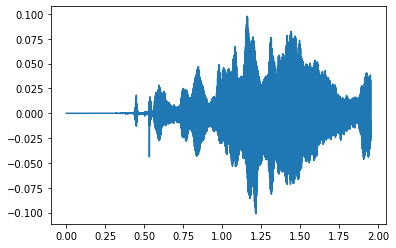

In [508]:
final_df = df_list_to_array.T

plt.plot(final_df["Tempo"], final_df["Sound Wave"])

Agora, tentei gravar imediatamente o csv a partir da lista. 

Não esquecer que o res era a lista recuperada a partir da string através do json, e portanto é equivalente a [time_sf.tolist(),soundwave_sf.tolist()]

In [511]:
res

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

In [509]:
res
with open("outro_teste.csv", "w") as f:
    write = csv.writer(f)
    write.writerows(res)

In [510]:
df_list = pd.read_csv("outro_teste.csv", header=None)
df_list.index = ["Tempo", "Sound Wave"]
df_list.T

,Tempo,Sound Wave
0,0.000000,0.000000
1,0.000045,0.000000
2,0.000091,-0.000023
3,0.000136,0.000000
4,0.000181,0.000000
...,...,...
43003,1.950295,-0.008789
43004,1.950340,-0.027576
43005,1.950385,-0.027600
43006,1.950431,-0.015160


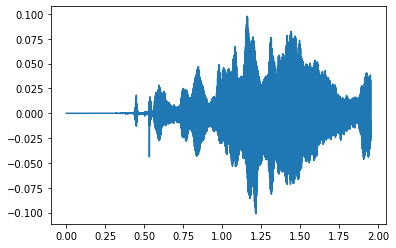

In [512]:
final_list_df = df_list.T

plt.plot(final_list_df["Tempo"], final_list_df["Sound Wave"])

In [518]:
with open("outro_teste.csv", "w") as f:
    write = csv.writer(f)
    write.writerow(res[1])

In [516]:
res[1]

[0.0,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 -2.3251488095238094e-05,
 2.3251488095238094e-05,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -2.3251488095238094e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

#### Nesta parte estou a salvar os dados de uma lista de arrays num ficheiro csv

Deixei aqui porque na verdade comecei por fazer isto. Só depois é que, como não conseguia encontrar forma de voltar de string(array) para o array, salvei listas para csv

In [365]:
#Função que vai salvar a lista=[time_sf, soundwave_sf] num ficheiro csv

def write_data(a):
    numpy.savetxt("teste_teste1.csv", a, delimiter=",")

write_data(lista)

In [421]:
#Permite abrir e visualizar o ficheiro csv gerado anteriormente (com muitos dados não abre)

with open("teste_teste33.csv", 'r') as file:
  csvreader = csv.reader(file)
  for row in csvreader:
    print(row)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Depois, foi preciso passar para uma DataFrame. Por comparação tenho a lista em cima e a df da lista (diretamente) em baixo, sendo que depois carreguei uma nova DataFrame a partir do ficheiro csv.

In [367]:
lista

[array([0.00000000e+00, 4.53521659e-05, 9.07043319e-05, ...,
        2.97206349e+00, 2.97210884e+00, 2.97215420e+00]),
 array([ 0.00000000e+00,  0.00000000e+00, -1.52587891e-05, ...,
         1.92108154e-02, -2.46276855e-02, -2.45971680e-02])]

In [387]:
dataframe2=pd.DataFrame(lista).T
dataframe2

,0,1
0,0.000000,0.000000
1,0.000045,0.000000
2,0.000091,-0.000015
3,0.000136,0.000000
4,0.000181,0.000000
...,...,...
65531,2.971973,0.019226
65532,2.972018,0.019211
65533,2.972063,0.019211
65534,2.972109,-0.024628


Tenho que especificar que o header é None, porque de outra forma os valores de tempo ficam nesse local. Acrescentei os indexes de Tempo e Sound Wave à dataFrame, para melhor compreensão 

In [368]:
df = pd.read_csv("teste_teste1.csv", header=None)
df.index = ["Tempo", "Sound Wave"]
df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
Tempo,0.0,0.000045,0.000091,0.000136,0.000181,0.000227,0.000272,0.000317,0.000363,0.000408,...,2.971746,2.971791,2.971837,2.971882,2.971927,2.971973,2.972018,2.972063,2.972109,2.972154
Sound Wave,0.0,0.000000,-0.000015,0.000000,0.000000,0.000000,0.000000,-0.000015,0.000000,0.000000,...,-0.003342,-0.003342,-0.010300,-0.010300,0.019226,0.019226,0.019211,0.019211,-0.024628,-0.024597


Confirmei que a transposta da Dataframe era igual à dataframe que foi criada diretamente a partir da lista

In [369]:
df.T

,Tempo,Sound Wave
0,0.000000,0.000000
1,0.000045,0.000000
2,0.000091,-0.000015
3,0.000136,0.000000
4,0.000181,0.000000
...,...,...
65531,2.971973,0.019226
65532,2.972018,0.019211
65533,2.972063,0.019211
65534,2.972109,-0.024628


E, finalmente, fiz o plot da dataFrame (a diferença de conotação foi apenas para perceber o que funcionava)

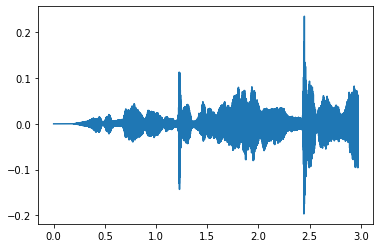

In [370]:
import matplotlib.pyplot as plt

final_df=df.T

plt.plot(final_df["Tempo"], final_df["Sound Wave"])

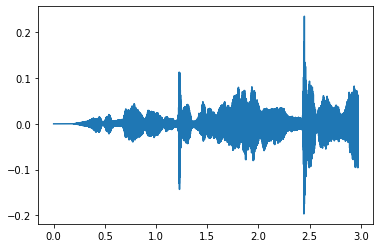

In [371]:
x = final_df["Tempo"]
y = final_df["Sound Wave"]

plt.plot(x,y)

### Juntar o rmse aos dados enviados por mqtt

In [525]:
time_rmse = librosa.times_like(rmse)
time_rmse

array([0.        , 0.02321995, 0.04643991, 0.06965986, 0.09287982,
       0.11609977, 0.13931973, 0.16253968, 0.18575964, 0.20897959,
       0.23219955, 0.2554195 , 0.27863946, 0.30185941, 0.32507937,
       0.34829932, 0.37151927, 0.39473923, 0.41795918, 0.44117914,
       0.46439909, 0.48761905, 0.510839  , 0.53405896, 0.55727891,
       0.58049887, 0.60371882, 0.62693878, 0.65015873, 0.67337868,
       0.69659864, 0.71981859, 0.74303855, 0.7662585 , 0.78947846,
       0.81269841, 0.83591837, 0.85913832, 0.88235828, 0.90557823,
       0.92879819, 0.95201814, 0.9752381 , 0.99845805, 1.021678  ,
       1.04489796, 1.06811791, 1.09133787, 1.11455782, 1.13777778,
       1.16099773, 1.18421769, 1.20743764, 1.2306576 , 1.25387755,
       1.27709751, 1.30031746, 1.32353741, 1.34675737, 1.36997732,
       1.39319728, 1.41641723, 1.43963719, 1.46285714, 1.4860771 ,
       1.50929705, 1.53251701, 1.55573696, 1.57895692, 1.60217687,
       1.62539683, 1.64861678, 1.67183673, 1.69505669, 1.71827

In [530]:
mega_lista=[time_sf.tolist(), soundwave_sf.tolist(), time_rmse.tolist(), rmse.tolist()]
mega_lista

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

In [531]:
with open("outro_teste.csv", "w") as f:
    write = csv.writer(f)
    write.writerows(mega_lista)

In [532]:
df_mega_lista = pd.read_csv("outro_teste.csv", header=None)
df_mega_lista.index = ["Tempo", "Sound Wave", "Tempo RMSE" ,"RMSE"]
df_mega_lista.T

,Tempo,Sound Wave,Tempo RMSE,RMSE
0,0.000000,0.000000,0.00000,0.000007
1,0.000045,0.000000,0.02322,0.000008
2,0.000091,-0.000023,0.04644,0.000010
3,0.000136,0.000000,0.06966,0.000010
4,0.000181,0.000000,0.09288,0.000010
...,...,...,...,...
43003,1.950295,-0.008789,NaN,NaN
43004,1.950340,-0.027576,NaN,NaN
43005,1.950385,-0.027600,NaN,NaN
43006,1.950431,-0.015160,NaN,NaN


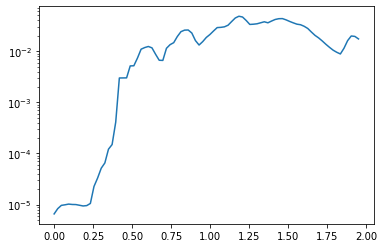

In [537]:
final_mega_lista_df = df_mega_lista.T

plt.semilogy(final_mega_lista_df["Tempo RMSE"], final_mega_lista_df["RMSE"])

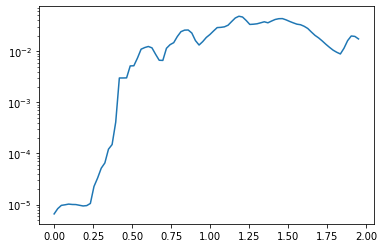

In [536]:
plt.semilogy(time_rmse, rmse, label='RMS Energy')

### Juntar o FFT e frequência fundamental à lista enviada

In [607]:
import statistics
FO_mean=[statistics.median(f0.tolist())]
FO_mean

[444.89662647846274]

In [608]:
mega_lista2=[time_sf.tolist(), soundwave_sf.tolist(), time_rmse.tolist(), rmse.tolist(), abs(Y).tolist(), frq.tolist(), FO_mean]
mega_lista2

[[0.0,
  4.535252843667753e-05,
  9.070505687335506e-05,
  0.0001360575853100326,
  0.00018141011374671012,
  0.00022676264218338764,
  0.0002721151706200652,
  0.0003174676990567427,
  0.00036282022749342023,
  0.00040817275593009775,
  0.0004535252843667753,
  0.0004988778128034528,
  0.0005442303412401304,
  0.0005895828696768078,
  0.0006349353981134854,
  0.0006802879265501629,
  0.0007256404549868405,
  0.000770992983423518,
  0.0008163455118601955,
  0.0008616980402968731,
  0.0009070505687335506,
  0.0009524030971702281,
  0.0009977556256069056,
  0.001043108154043583,
  0.0010884606824802608,
  0.0011338132109169382,
  0.0011791657393536157,
  0.0012245182677902934,
  0.0012698707962269708,
  0.0013152233246636483,
  0.0013605758531003258,
  0.0014059283815370035,
  0.001451280909973681,
  0.0014966334384103584,
  0.001541985966847036,
  0.0015873384952837136,
  0.001632691023720391,
  0.0016780435521570685,
  0.0017233960805937462,
  0.0017687486090304236,
  0.001814101137467

In [609]:
with open("outro_teste.csv", "w") as f:
    write = csv.writer(f)
    write.writerows(mega_lista2)

In [611]:
df_mega_lista1 = pd.read_csv("outro_teste.csv", header=None)
df_mega_lista1.index = ["Tempo", "Sound Wave", "Tempo RMSE" ,"RMSE", "Y", "FRQ", "F0"]
df_mega_lista1.T

,Tempo,Sound Wave,Tempo RMSE,RMSE,Y,FRQ,F0
0,0.000000,0.000000,0.00000,0.000007,0.000008,0.000000,444.896626
1,0.000045,0.000000,0.02322,0.000008,0.000034,0.512695,NaN
2,0.000091,-0.000023,0.04644,0.000010,0.000029,1.025391,NaN
3,0.000136,0.000000,0.06966,0.000010,0.000021,1.538086,NaN
4,0.000181,0.000000,0.09288,0.000010,0.000028,2.050781,NaN
...,...,...,...,...,...,...,...
43003,1.950295,-0.008789,NaN,NaN,NaN,NaN,NaN
43004,1.950340,-0.027576,NaN,NaN,NaN,NaN,NaN
43005,1.950385,-0.027600,NaN,NaN,NaN,NaN,NaN
43006,1.950431,-0.015160,NaN,NaN,NaN,NaN,NaN


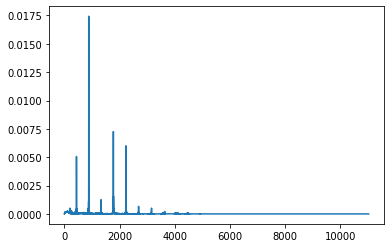

In [612]:
final_mega_lista_df = df_mega_lista1.T

plt.plot(final_mega_lista_df["FRQ"], final_mega_lista_df["Y"])

In [614]:
final_mega_lista_df["F0"][0]

444.89662647846274